Dal dataset originale identifica i top 1% degli outliers
Adotta almeno tre diversi metodi appartenenti a famiglie diverse (ad esempio statistical/depth based, distance-based,
density-based, angle-based, ...) e compara i risultati

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as datet
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn

from scipy import stats
from scipy.stats import zscore

## Acquisizione del dataset

In [2]:
# Dataset con attributi originali
df3 = pd.read_csv("../datatraining.txt")
df1 = pd.read_csv("../datatest.txt")
df2 = pd.read_csv("../datatest2.txt")

In [3]:
df3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [4]:
df1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
df2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [6]:
df3.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [7]:
frames = [df1, df3, df2]
df = pd.concat(frames, ignore_index=True)
#Dataset copia per avere la data
date_df = pd.concat(frames, ignore_index=True)

In [8]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [9]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

Valutiamo i valori degli outliers che sono stati trovati dall'intersezione dei metodi (andrebbe fatto dopo)

In [11]:
df[df["date"]=='2015-02-07 09:42:59']

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
6497,2015-02-07 09:42:59,20.745,18.89,1451.75,453.0,0.002853,0


In [12]:
df[df["date"]=='2015-02-07 09:42:00']

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
6496,2015-02-07 09:42:00,20.7,18.89,1546.333333,455.333333,0.002845,0


In [13]:
df[df["date"]=='2015-02-12 09:47:00']

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
11947,2015-02-12 09:47:00,22.79,25.29,1581.0,1211.5,0.004338,1


In [14]:
df[df["date"]=='2015-02-12 09:46:00']

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
11946,2015-02-12 09:46:00,22.772,25.29,1380.0,1202.5,0.004333,1


In [15]:
df[df["date"]=='2015-02-04 09:40:00']

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2601,2015-02-04 09:40:00,22.6,25.4725,1419.5,945.0,0.004319,1


# Dataset Preparation

In [11]:
columns2remove = ['date']
df.drop(columns2remove, inplace=True, axis=1)

In [12]:
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

Acquisizione brutale delle colonne

In [13]:
date = date_df["date"]
Temperature = date_df["Temperature"]
Humidity = date_df["Humidity"]
Light = date_df["Light"]
CO2 = date_df["CO2"]
HumidityRatio = date_df["HumidityRatio"]

# LOF - LOCAL OUTLIER FACTOR

In [66]:
from sklearn.neighbors import LocalOutlierFactor

In [67]:
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)

In [68]:
print(np.unique(y_pred, return_counts=True))
y_outliers = X[y_pred==-1]
y_outliers

(array([-1,  1]), array([  731, 19829], dtype=int64))


array([[2.22600000e+01, 2.48566667e+01, 0.00000000e+00, 7.69333333e+02,
        4.12698756e-03],
       [2.22300000e+01, 2.47933333e+01, 0.00000000e+00, 7.63250000e+02,
        4.10884135e-03],
       [2.22600000e+01, 2.48233333e+01, 0.00000000e+00, 7.62333333e+02,
        4.12141651e-03],
       ...,
       [2.08650000e+01, 2.68650000e+01, 1.70000000e+01, 1.47625000e+03,
        4.09520552e-03],
       [2.07900000e+01, 2.67450000e+01, 5.07500000e+01, 1.46375000e+03,
        4.05789464e-03],
       [2.07900000e+01, 2.71225000e+01, 2.96000000e+02, 1.46700000e+03,
        4.11554993e-03]])

In [69]:
np.where(y_pred==-1)

(array([  233,   235,   236,   237,   238,   239,   240,   244,   245,
          246,   247,   249,   252,   253,   254,   266,   306,   328,
          329,   331,   361,   364,   378,   386,   454,   458,   459,
          465,   470,   471,   475,   480,   481,   483,   486,   489,
          490,   494,   498,   499,   750,   833,   940,   944,   954,
          973,  1371,  1393,  1741,  1748,  1767,  1770,  1771,  1785,
         1786,  1787,  1788,  1789,  1790,  1791,  1792,  1793,  1794,
         1795,  1796,  1797,  1798,  1799,  1800,  1801,  1802,  1803,
         1804,  1805,  1806,  1810,  1824,  1825,  1828,  1909,  2478,
         2479,  2600,  2601,  2602,  2603,  2616,  2681,  2755,  2756,
         2758,  2759,  2760,  2761,  2780,  2781,  2782,  2783,  2784,
         2785,  2786,  2787,  2788,  2789,  2790,  2791,  2794,  2795,
         3003,  3198,  3210,  3228,  3229,  3321,  3772,  3776,  3779,
         3821,  3822,  3830,  3833,  3834,  3835,  3836,  3837,  3838,
      

In [70]:
clf.negative_outlier_factor_[np.where(y_pred==-1)]

array([ -1.9538142 ,  -1.69287494,  -1.62766459,  -1.70807757,
        -1.71198712,  -1.53012212,  -1.70243209,  -1.73648601,
        -2.03607666,  -3.07792506,  -3.61385533,  -2.38109077,
        -2.26212819,  -1.72610094,  -1.56287821,  -1.50753051,
        -1.59597675,  -1.55285714,  -1.57244137,  -1.55310275,
        -1.51133321,  -1.51453687,  -1.61546011,  -1.59674676,
        -1.55165012,  -1.71589326,  -1.69844128,  -1.5577549 ,
        -1.5577549 ,  -1.55667641,  -2.04820491,  -1.99498418,
        -2.09273335,  -1.57180837,  -1.61047653,  -2.04566089,
        -2.04991831,  -1.56926348,  -1.56985026,  -1.95944554,
        -1.81428828,  -1.56044665,  -1.5316162 ,  -1.99474196,
        -1.74728964,  -1.55471501, -10.13726099,  -2.89521934,
        -1.51811981,  -1.52609872,  -1.57062751,  -1.71786347,
        -1.66855348,  -1.85838164,  -1.82646078,  -1.75300035,
        -1.8373346 ,  -1.71986124,  -1.92255295,  -1.69920246,
        -1.89208722,  -2.16164763,  -2.66498664,  -2.97

In [71]:
#Il più grande outlier factor
np.max(clf.negative_outlier_factor_[np.where(y_pred==-1)])

-1.5002202733618775

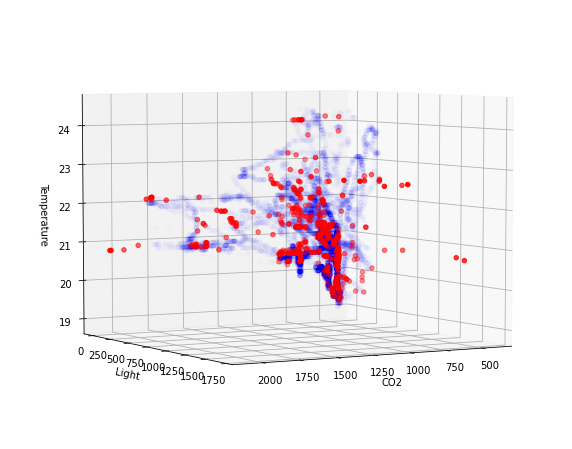

In [101]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

sequence_containing_x_vals = X[:, 3]
sequence_containing_y_vals = X[:, 2]
sequence_containing_z_vals = X[:, 0]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c='b', alpha = 0.01)


sequence_containing_x_vals = y_outliers[:,3]
sequence_containing_y_vals = y_outliers[:,2]
sequence_containing_z_vals = y_outliers[:,0]
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c = 'r')

ax.set_xlabel('CO2')
ax.set_ylabel('Light')
ax.set_zlabel('Temperature') 

ax.view_init(5, 60)
plt.show()



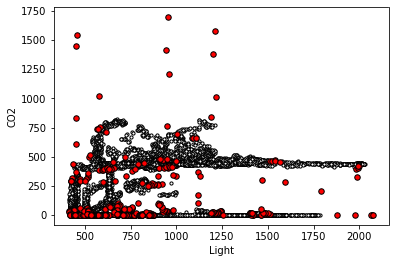

In [19]:
#Scatterplot di CO2 e Light
y_outliers = X[y_pred==-1]
a = plt.scatter(X[:, 3], X[:, 2], c='white', edgecolor='k', s=10)
b = plt.scatter(y_outliers[:,3], y_outliers[:, 2], c='red', edgecolor='k', s=30)
plt.ylabel("CO2")
plt.xlabel("Light")
plt.show()

negative_outlier_factor
Un valore normale tende ad avere un LOF score vicino ad 1 e un negative_outlier_factor vicino
a -1, mentre gli outliers tendono ad avere un LOF score più alto.

Al fine di eseguire il task è stata utilizzata la funzione LocalOutlierFactor che consente
di calcolare l’opposto del LOF score per ogni punto del dataset. Sono stati quindi
ordinati i punti per LOF score crescente in modo da ottenere il top 1% degli outlier. I
seguenti scatter plot mostrano i punti classificati come outlier in rosso e l’andamento
del LOF score sui punti del dataset.

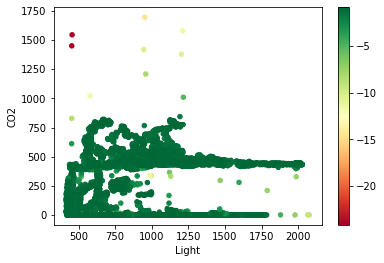

In [20]:
plt.scatter(X[:, 3], X[:, 2], s=20, c=clf.negative_outlier_factor_, cmap='RdYlGn')
plt.ylabel("CO2")
plt.xlabel("Light")
plt.colorbar()
plt.show()

## Voglio solo i top-1% degli outliers

In [21]:
len(clf.negative_outlier_factor_)

20560

In [105]:
#perc = int(float(len(X))*0.01)
perc =20

In [106]:
Y = []
for i in range(0,len(X)):
    Y.append((X[i],clf.negative_outlier_factor_[i]))

In [107]:
def takeSecond(elem):
    return elem[1];
#Ordino sulla base del LOF factor
Z = sorted(Y, key=takeSecond)

In [108]:
Z[0][0]

array([2.07450000e+01, 1.88900000e+01, 1.45175000e+03, 4.53000000e+02,
       2.85265863e-03])

In [109]:
R = Z[0][0]
for i in range(1,perc):
    R = np.vstack((R,Z[i][0]));
    
W = Z[perc+1][0]
for i in range(perc+1,len(Z)):
    W = np.vstack((W,Z[i][0]));

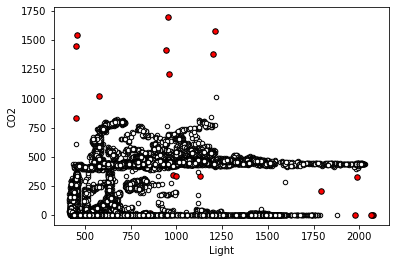

In [110]:
a = plt.scatter(R[:,3],R[:,2], c='red', edgecolor='k', s=30)
b = plt.scatter(W[:,3],W[:,2], c='white', edgecolor='k', s=20)
plt.ylabel("CO2")
plt.xlabel("Light")
plt.show()

In [111]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([  731, 19829], dtype=int64))

Prendiamo il datetime dei primi outliers

In [112]:
first_10_outliers = Z[0:10]

In [113]:
first_10_outliers[0]

(array([2.07450000e+01, 1.88900000e+01, 1.45175000e+03, 4.53000000e+02,
        2.85265863e-03]),
 -24.101740157175342)

In [114]:
#Colonna con outlier (date), lof score 
LOF_res = []

In [115]:
for i in range(0,10):
    for j in range(0, len(date)):
        if(Temperature[j] == first_10_outliers[i][0][0] and
              Humidity[j] == first_10_outliers[i][0][1] and
                  Light[j] == first_10_outliers[i][0][2] and
                      CO2[j] == first_10_outliers[i][0][3] and
                          HumidityRatio[j] == first_10_outliers[i][0][4]):
            LOF_res.append((date[j], first_10_outliers[i][1]))

In [116]:
LOF_res

[('2015-02-07 09:42:59', -24.101740157175342),
 ('2015-02-07 09:42:00', -23.975726272442504),
 ('2015-02-04 09:40:59', -14.633555600151965),
 ('2015-02-05 13:07:00', -11.592329775297575),
 ('2015-02-13 09:49:00', -11.561761079105327),
 ('2015-02-12 09:47:00', -11.466158830194948),
 ('2015-02-12 09:46:00', -10.564648124142575),
 ('2015-02-04 09:40:00', -10.337474521703653),
 ('2015-02-03 13:09:59', -10.137260986894017),
 ('2015-02-18 01:51:00', -9.369973384314942)]

# DEPTH-BASED - ConvexHull - LIGHT CO2
Simple implementation based on ConvexHull function in Scipy library

In [18]:
double_array= []
for i in range(0, len(CO2)):
    double_array.append([CO2[i], Light[i]])

In [19]:
from scipy.spatial import ConvexHull


hull = ConvexHull(np.array(double_array))

def depth_outliers_745(points):
    depth = list()
    it = 0
    dataset = points
    while len(dataset) > 0 and it < 500:
            if len(dataset) > 2:
                hull = ConvexHull(dataset)
                hv = hull.vertices
            else:
                hv = range(len(dataset))
            depth.append(dataset[hv])
            it = it + 1
            print("Iterazione :" + str(it))
            dataset = np.array([ dataset[i] for i in range(len(dataset)) if i not in hv])
    return depth


In [21]:
def depth_outliers_4(points):
    depth = list()
    it = 0
    dataset = points
    while len(dataset) > 0 and it < 4:
            if len(dataset) > 2:
                hull = ConvexHull(dataset)
                hv = hull.vertices
            else:
                hv = range(len(dataset))
            depth.append(dataset[hv])
            it = it + 1
            print("Iterazione :" + str(it))
            dataset = np.array([ dataset[i] for i in range(len(dataset)) if i not in hv])
    return depth


Iterazione :1
Iterazione :2
Iterazione :3
Iterazione :4
Layers:  4


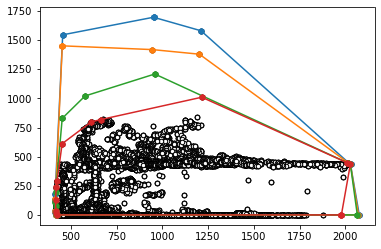

In [22]:

depth_set = depth_outliers_4(np.array(double_array))
print ("Layers: ", len(depth_set))

for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plt.plot(dd2[:,0], dd2[:,1], 'h-')
    plt.scatter(CO2, Light, c='white', edgecolor='k', s=20)

Text(0.5, 0, 'Light')

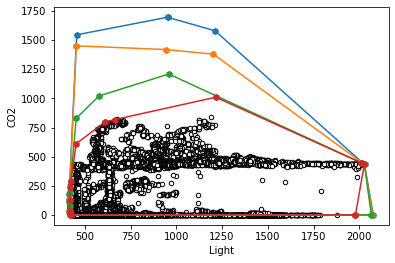

In [23]:
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plt.plot(dd2[:,0], dd2[:,1], 'h-')
plt.scatter(CO2, Light, c='white', edgecolor='k', s=20)
plt.ylabel("CO2")
plt.xlabel("Light")

Iterazione :1
Iterazione :2
Iterazione :3
Iterazione :4
Iterazione :5
Iterazione :6
Iterazione :7
Iterazione :8
Iterazione :9
Iterazione :10
Iterazione :11
Iterazione :12
Iterazione :13
Iterazione :14
Iterazione :15
Iterazione :16
Iterazione :17
Iterazione :18
Iterazione :19
Iterazione :20
Iterazione :21
Iterazione :22
Iterazione :23
Iterazione :24
Iterazione :25
Iterazione :26
Iterazione :27
Iterazione :28
Iterazione :29
Iterazione :30
Iterazione :31
Iterazione :32
Iterazione :33
Iterazione :34
Iterazione :35
Iterazione :36
Iterazione :37
Iterazione :38
Iterazione :39
Iterazione :40
Iterazione :41
Iterazione :42
Iterazione :43
Iterazione :44
Iterazione :45
Iterazione :46
Iterazione :47
Iterazione :48
Iterazione :49
Iterazione :50
Iterazione :51
Iterazione :52
Iterazione :53
Iterazione :54
Iterazione :55
Iterazione :56
Iterazione :57
Iterazione :58
Iterazione :59
Iterazione :60
Iterazione :61
Iterazione :62
Iterazione :63
Iterazione :64
Iterazione :65
Iterazione :66
Iterazione :67
Iter

Text(0.5, 0, 'Light')

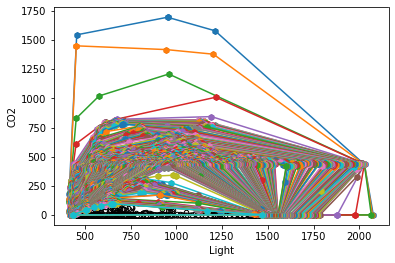

In [34]:
double_array= []
for i in range(0, len(CO2)):
    double_array.append([CO2[i], Light[i]])

depth_set = depth_outliers_745(np.array(double_array))
print ("Layers: ", len(depth_set))
for dd in depth_set:
    dd2 = np.append(dd,[dd[0]],axis=0)
    plt.plot(dd2[:,0], dd2[:,1], 'h-')
plt.scatter(CO2, Light, c='white', edgecolor='k', s=20)
plt.ylabel("CO2")
plt.xlabel("Light")

Convex Hull 3D

In [24]:
triple_array= []
for i in range(0, len(CO2)):
    if(Light[i]!=0):
        triple_array.append([CO2[i], Light[i], Temperature[i]])

In [25]:
triple_array = np.array(triple_array)

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

In [27]:
print(triple_array)

[[ 749.2         585.2          23.7       ]
 [ 760.4         578.4          23.718     ]
 [ 769.66666667  572.66666667   23.73      ]
 ...
 [1521.5         423.5          20.89      ]
 [1632.          418.75         20.89      ]
 [1864.          409.           21.        ]]


In [28]:
triple_array_tot = []
for i in range(0, len(CO2)):
    triple_array_tot.append([CO2[i], Light[i], Temperature[i]])
triple_array_tot = np.array(triple_array_tot)

In [29]:
triple_array

array([[ 749.2       ,  585.2       ,   23.7       ],
       [ 760.4       ,  578.4       ,   23.718     ],
       [ 769.66666667,  572.66666667,   23.73      ],
       ...,
       [1521.5       ,  423.5       ,   20.89      ],
       [1632.        ,  418.75      ,   20.89      ],
       [1864.        ,  409.        ,   21.        ]])

In [30]:
hull = ConvexHull(triple_array_tot)

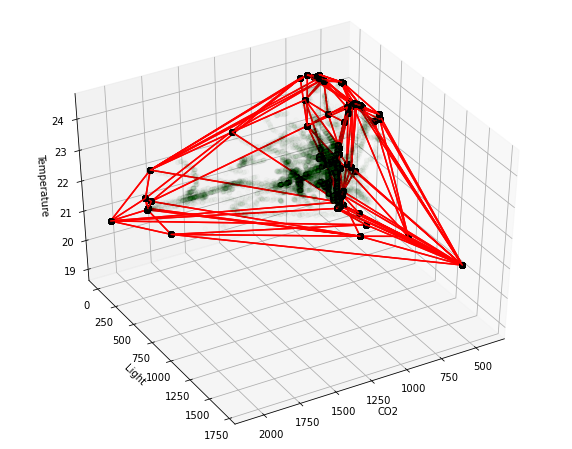

In [46]:
# -----------------------
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
# Plot defining corner points
# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(triple_array_tot[s, 0], triple_array_tot[s, 1], triple_array_tot[s, 2],"ko")
    ax.plot(triple_array_tot[s, 0], triple_array_tot[s, 1], triple_array_tot[s, 2], "r-")
ax.scatter(triple_array_tot.T[0], triple_array_tot.T[1], triple_array_tot.T[2], color='g', alpha = 0.01, edgecolors ="k")

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))
    
ax.set_xlabel('CO2')
ax.set_ylabel('Light')
ax.set_zlabel('Temperature') 

ax.view_init(40, 60)
plt.show()

In [33]:
hull = ConvexHull(triple_array_tot)

In [40]:
type(triple_array_tot[s, 0])

numpy.ndarray

# Grubb's Test (Generalized ESD - non funziona? non è normale)

In [34]:
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

In [35]:

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [36]:
def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))
    else:
        print('{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))

In [37]:
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)

In [38]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
np.delete(arr, 1, 0)

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [190]:
x = np.array(Light)

In [193]:
x = np.delete(x, 2602)
print(len(x))

20559


In [197]:
ESD_Test(np.array(Light), 0.05, 9)

Grubbs Critical Value: 4.7125408803866495
Grubbs Statistics Value : 7.444399361911846
1697.25 is an outlier. G > G-critical: 7.4444 > 4.7125 

Grubbs Critical Value: 4.712530923133029
Grubbs Statistics Value : 6.901450558796002
1581.0 is an outlier. G > G-critical: 6.9015 > 4.7125 

Grubbs Critical Value: 4.712520965370457
Grubbs Statistics Value : 6.744476117960084
1546.33333333333 is an outlier. G > G-critical: 6.7445 > 4.7125 

Grubbs Critical Value: 4.71251100709903
Grubbs Statistics Value : 6.301033387085693
1451.75 is an outlier. G > G-critical: 6.3010 > 4.7125 

Grubbs Critical Value: 4.712501048337408
Grubbs Statistics Value : 6.153330877043717
1419.5 is an outlier. G > G-critical: 6.1533 > 4.7125 

Grubbs Critical Value: 4.71249108906711
Grubbs Statistics Value : 5.970427895458254
1380.0 is an outlier. G > G-critical: 5.9704 > 4.7125 

Grubbs Critical Value: 4.712481129269645
Grubbs Statistics Value : 5.161868056943082
1209.8 is an outlier. G > G-critical: 5.1619 > 4.7125 

Gr

In [50]:
ESD_Test(np.array(Light), 0.05, 7)

Grubbs Critical Value: 4.7125408803866495
Grubbs Statistics Value : 7.444399361911846
1697.25 is an outlier. G > G-critical: 7.4444 > 4.7125 

Grubbs Critical Value: 4.712530923133029
Grubbs Statistics Value : 6.901450558796002
1581.0 is an outlier. G > G-critical: 6.9015 > 4.7125 

Grubbs Critical Value: 4.712520965370457
Grubbs Statistics Value : 6.744476117960084
1546.33333333333 is an outlier. G > G-critical: 6.7445 > 4.7125 

Grubbs Critical Value: 4.71251100709903
Grubbs Statistics Value : 6.301033387085693
1451.75 is an outlier. G > G-critical: 6.3010 > 4.7125 

Grubbs Critical Value: 4.712501048337408
Grubbs Statistics Value : 6.153330877043717
1419.5 is an outlier. G > G-critical: 6.1533 > 4.7125 

Grubbs Critical Value: 4.71249108906711
Grubbs Statistics Value : 5.970427895458254
1380.0 is an outlier. G > G-critical: 5.9704 > 4.7125 

Grubbs Critical Value: 4.712481129269645
Grubbs Statistics Value : 5.161868056943082
1209.8 is an outlier. G > G-critical: 5.1619 > 4.7125 



In [51]:
ESD_Test(np.array(x[300:1000]), 0.5, 9)


Grubbs Critical Value: 3.371402809864498
Grubbs Statistics Value : 2.3393870329829025
686.0 is not an outlier. G > G-critical: 2.3394 > 3.3714 

Grubbs Critical Value: 3.370996878443238
Grubbs Statistics Value : 2.3452889280848512
685.75 is not an outlier. G > G-critical: 2.3453 > 3.3710 

Grubbs Critical Value: 3.3705903128190355
Grubbs Statistics Value : 2.3362475862661043
684.75 is not an outlier. G > G-critical: 2.3362 > 3.3706 

Grubbs Critical Value: 3.3701831110742306
Grubbs Statistics Value : 2.3421090325087186
684.5 is not an outlier. G > G-critical: 2.3421 > 3.3702 

Grubbs Critical Value: 3.3697752712824194
Grubbs Statistics Value : 2.3362882576291186
683.666666666667 is not an outlier. G > G-critical: 2.3363 > 3.3698 

Grubbs Critical Value: 3.369366791508768
Grubbs Statistics Value : 2.3438339660675256
683.5 is not an outlier. G > G-critical: 2.3438 > 3.3694 

Grubbs Critical Value: 3.3689576698094927
Grubbs Statistics Value : 2.3447189975051597
683.0 is not an outlier. G 

In [48]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(x[200:600])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=156.851, p=0.000
Sample does not look Gaussian (reject H0)


# ABOD

In [238]:
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

In [239]:
from pyod.models.abod import ABOD

In [240]:
clf = ABOD(n_neighbors=20)
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=20)

In [173]:
max(clf.decision_scores_)

-1.9868156662236268e-12

In [241]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([18593,  1967], dtype=int64))

In [195]:
#Colonna con outlier (date), ABOD score 
ABOD_res = []
it = 0
for i in date:
    if outliers[it] == 1:
        ABOD_res.append((i, clf.decision_scores_[it]))
    it = it + 1

In [196]:
clf.decision_scores_[np.where(outliers==1)]

array([-6.97718576e-07, -2.94074701e-06, -5.81050376e-06, ...,
       -2.57822901e-06, -2.58540169e-06, -1.64391487e-07])

In [198]:
ABOD_LOF_res = []
for i,j in LOF_res:
    for k, s in ABOD_res:
        if i==k:
            ABOD_LOF_res.append((k, s))

In [199]:
ABOD_LOF_res

[('2015-02-07 09:42:59', -2.513307328659954e-11),
 ('2015-02-07 09:42:00', -1.1767515673475175e-11),
 ('2015-02-04 09:40:59', -1.9868156662236268e-12),
 ('2015-02-05 13:07:00', -2.306174032818333e-08),
 ('2015-02-13 09:49:00', -4.7755533156445e-12),
 ('2015-02-12 09:47:00', -4.205047176658341e-12),
 ('2015-02-12 09:46:00', -1.541498278020964e-11),
 ('2015-02-04 09:40:00', -1.2509116073261053e-11),
 ('2015-02-03 13:09:59', -1.060251454706674e-08),
 ('2015-02-18 01:51:00', -8.412701362140855e-07)]

# ABOD NEIGHBOURS 7

In [239]:
from pyod.models.abod import ABOD

In [252]:
clf = ABOD(n_neighbors=10)
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=10)

In [253]:
max(clf.decision_scores_)

-0.0

In [254]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\pyod\models\base.py:168: RuntimeWarning: invalid value encountered in greater
  return (pred_score > self.threshold_).astype('int').ravel()


(array([0, 1]), array([18559,  2001], dtype=int64))

In [255]:
#Colonna con outlier (date), ABOD score 
ABOD_res_10 = []
it = 0
for i in date:
    if outliers[it] == 1:
        ABOD_res_10.append((i, clf.decision_scores_[it]))
    it = it + 1

In [256]:
clf.decision_scores_[np.where(outliers==1)]

array([-1.03278073e-06, -7.86580584e-06, -1.01062153e-05, ...,
       -6.35305207e-06, -7.13963351e-06, -1.46440296e-07])

In [257]:
ABOD_LOF_res_10 = []
for i,j in LOF_res:
    for k, s in ABOD_res_10:
        if i==k:
            ABOD_LOF_res_10.append((k, s))

In [258]:
ABOD_LOF_res_10

[('2015-02-07 09:42:59', -4.348729959039457e-11),
 ('2015-02-07 09:42:00', -2.1875771119282008e-11),
 ('2015-02-04 09:40:59', -5.880587193783182e-12),
 ('2015-02-05 13:07:00', -4.598913983346434e-08),
 ('2015-02-13 09:49:00', -9.145173702181726e-12),
 ('2015-02-12 09:47:00', -9.2613500522263e-12),
 ('2015-02-12 09:46:00', -2.850660694241301e-11),
 ('2015-02-04 09:40:00', -2.5883701400573378e-11),
 ('2015-02-03 13:09:59', -2.1826092199324434e-08),
 ('2015-02-18 01:51:00', -3.3799403068679393e-06)]

# KNN

In [105]:
from pyod.models.knn import KNN

In [106]:
clf = KNN()
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [107]:
clf.decision_scores_

array([25.77791707, 14.40479525, 12.59785793, ..., 16.47414951,
       16.599055  , 26.4345963 ])

In [108]:
anomlay_score = clf.decision_function(X)

In [109]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([18953,  1607], dtype=int64))

In [110]:
#Colonna con outlier (date), KNN score 
KNN_res = []
it = 0
for i in date:
    if outliers[it] == 1:
        KNN_res.append((i, clf.decision_scores_[it]))
    it = it + 1

In [111]:
KNN_LOF_res = []
for i,j in LOF_res:
    for k, s in KNN_res:
        if i==k:
            KNN_LOF_res.append((k, s))

NameError: name 'LOF_res' is not defined

In [ ]:
KNN_LOF_res

In [ ]:
perc =20

Y = []
for i in range(0,len(X)):
    Y.append((X[i],clf.decision_scores_[i] ))

def takeSecond(elem):
    return elem[1];
#Ordino sulla base del LOF factor
Z = sorted(Y, key=takeSecond, reverse = True)
R = Z[0][0]
for i in range(1,perc):
    R = np.vstack((R,Z[i][0]));
    
W = Z[perc+1][0]
for i in range(perc+1,len(Z)):
    W = np.vstack((W,Z[i][0]));
a = plt.scatter(R[:,3],R[:,2], c='red', edgecolor='k', s=30)
b = plt.scatter(W[:,3],W[:,2], c='white', edgecolor='k', s=20)
plt.ylabel("CO2")
plt.xlabel("Light")
plt.show()

In [270]:
Z[0:10]

[('2015-02-07 09:42:00', 605.4577892640112),
 ('2015-02-12 09:47:00', 570.51405425283),
 ('2015-02-07 09:42:59', 560.5516005536152),
 ('2015-02-04 09:40:59', 518.8959812182878),
 ('2015-02-04 09:40:00', 490.3584656720532),
 ('2015-02-04 09:42:00', 426.9079484341421),
 ('2015-02-12 09:46:00', 404.37998749196316),
 ('2015-02-18 01:51:00', 292.189688608857),
 ('2015-02-17 22:56:00', 287.58252516467326),
 ('2015-02-18 01:49:00', 281.44159004000994)]

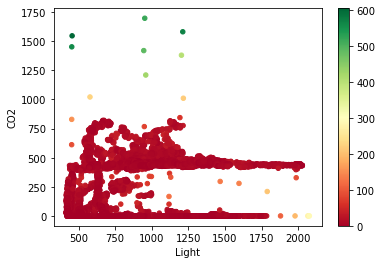

In [276]:
plt.scatter(X[:, 3], X[:, 2], s=20, c=clf.decision_scores_, cmap='RdYlGn')
plt.ylabel("CO2")
plt.xlabel("Light")
plt.colorbar()
plt.show()

# DBSCAN

In [213]:
#Un'altra possibilità è il dbscan
from sklearn.cluster import DBSCAN

In [214]:
#In questo caso abbiamo fittato l'algoritmo con questi parametri
dbscan = DBSCAN(eps=100, min_samples=4)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=100, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [215]:
np.unique(dbscan.labels_, return_counts=True)
#Si focalizza sulla label "-1". 3 punti sono identificati come outliers

(array([-1,  0,  1], dtype=int64), array([   13, 20543,     4], dtype=int64))

In [217]:
#E questi sono gli outliers identificati con dbscan
out = date_df.loc[np.where(dbscan.labels_==-1)]
print(len(out))
out

13


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2601,2015-02-04 09:40:00,22.600000,25.472500,1419.500000,945.000000,0.004319,1
2602,2015-02-04 09:40:59,22.700000,25.500000,1697.250000,951.750000,0.004350,1
2603,2015-02-04 09:42:00,22.700000,25.456000,1209.800000,958.600000,0.004343,1
6496,2015-02-07 09:42:00,20.700000,18.890000,1546.333333,455.333333,0.002845,0
6497,2015-02-07 09:42:59,20.745000,18.890000,1451.750000,453.000000,0.002853,0
6498,2015-02-07 09:43:59,20.760000,18.856667,829.000000,452.666667,0.002850,0
9878,2015-02-09 18:04:00,22.100000,37.790000,209.500000,1788.500000,0.006234,1
11946,2015-02-12 09:46:00,22.772000,25.290000,1380.000000,1202.500000,0.004333,1
11947,2015-02-12 09:47:00,22.790000,25.290000,1581.000000,1211.500000,0.004338,1
11948,2015-02-12 09:48:00,22.790000,25.100000,1010.500000,1215.500000,0.004305,1
